In [19]:
import pywt
import numpy as np
import h5py
import matplotlib.pyplot as plt
from PIL import Image

In [17]:
def loadBradyHShdf5(file,normalize='yes'):
    '''

    Parameters
    ----------
    file : str
        path to brady hotspring h5py data file
    normalize : str, optional
        "yes" or "no". Indicates whether or not to remove laser drift and 
        normalize. The default is 'yes'.

    Returns
    -------
    data : np array
        channel by samples numpy array of data
    timestamp_arr : numpy array
        array of the timestamps corresponding to the various samples in the 
        data. Timestamps for brady hotspring data are with respect to the 
        beginning time of the survey.

    '''
    
    with h5py.File(file,'r') as open_file: 
        dataset = open_file['das']
        time=open_file['t']
        data=np.array(dataset)
        timestamp_arr=np.array(time)
    data = np.transpose(data)
    if normalize=='yes':
        nSamples=np.shape(data)[1]
        # get rid of laser drift
        med = np.median(data,axis=0)
        for i in range(nSamples):
          data[:,i] = data[:,i] - med[i]
          
        max_of_rows = abs(data[:,:]).sum(axis=1)
        data = data/ max_of_rows[:, np.newaxis]
    return data, timestamp_arr

file = r"D:\CSM\Mines_Research\Test_data\Brady Hotspring\PoroTomo_iDAS16043_160314083848.h5"
data,_ = loadBradyHShdf5(file,normalize='yes')
samples_per_sec=1000

C:\Users\issah\AppData\Local\Temp\ipykernel_12760\217755895.py:23: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


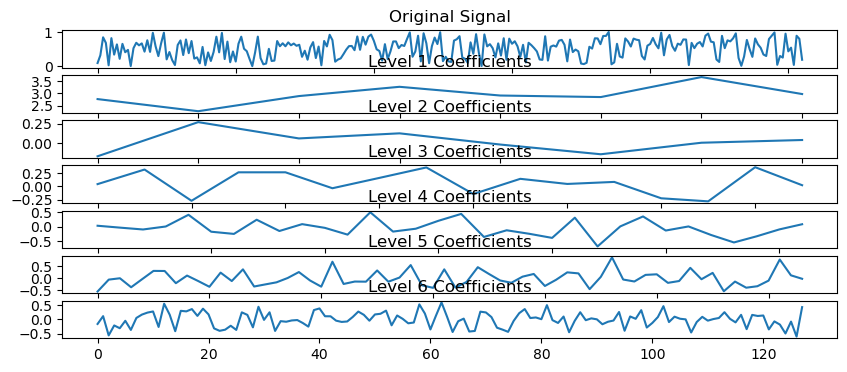

In [2]:
# Sample data for decomposition
data = np.random.rand(256)

# Define the wavelet and decomposition level
wavelet = 'haar'  # You can choose a different wavelet
level = 5  # Number of decomposition levels

# Perform wavelet decomposition
coeffs = pywt.wavedec(data, wavelet, level=level)

# Plot the original signal
plt.figure(figsize=(10, 4))
plt.subplot(level + 2, 1, 1)
plt.plot(data)
plt.title('Original Signal')

# Plot the wavelet coefficients for each level
for i in range(1, level + 2):
    plt.subplot(level + 2, 1, i + 1)
    plt.plot(coeffs[i - 1])
    plt.title(f'Level {i} Coefficients')

plt.tight_layout()
plt.show()


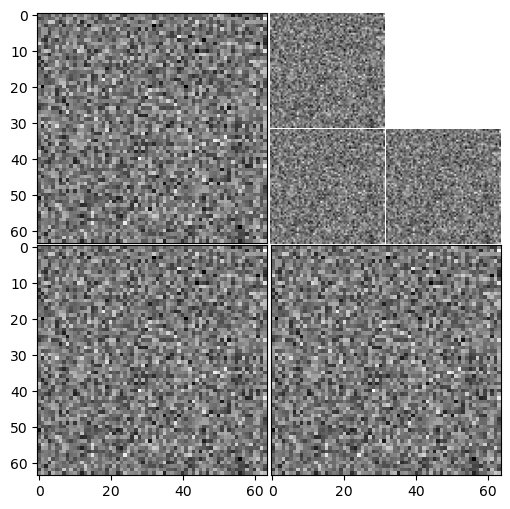

In [18]:
plt.figure(figsize=(8, 8))
# gs1 = gridspec.GridSpec(12, 6)
# gs1.update(wspace=0, hspace=0.05) #
ax1 = plt.subplot(2,2,1)
plt.imshow(coeffs[level_num][0], cmap='gray')
ax2 = plt.subplot(2,2,3)
plt.imshow(coeffs[level_num][0], cmap='gray')
ax3 = plt.subplot(2,2,4)
plt.imshow(coeffs[level_num][0], cmap='gray')
ax4 = plt.subplot(4,4,3)
plt.imshow(coeffs[level_num][0], cmap='gray')
ax5 = plt.subplot(4,4,7)
plt.imshow(coeffs[level_num][0], cmap='gray')
ax6 = plt.subplot(4,4,8)
plt.imshow(coeffs[level_num][0], cmap='gray')
ax1.xaxis.set_visible(False) 
ax3.yaxis.set_visible(False) 
ax4.axis('off')
ax5.axis('off')
ax6.axis('off')
plt.subplots_adjust(wspace=0.005, hspace=0.009)
axes = [ax1, ax2, ax3, ax4,ax5,ax6]

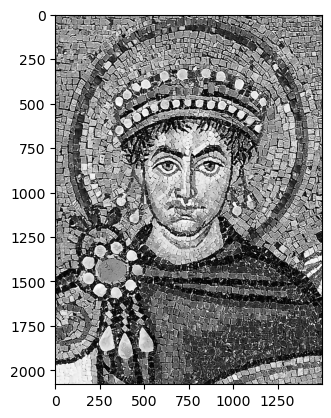

In [24]:
# Load image
# from PIL import Image

# img = np.array(Image.open(r'D:\CSM\Mines_Research\Codes\Python\Organised_code\baboon.gif').convert('L'))
# img = np.array(Image.open(r'D:\CSM\Mines_Research\Lichtenstein_img_processing_test.png').convert('L'))
img = np.array(Image.open(r'D:\CSM\Mines_Research\justinian.jpg').convert('L'))
plt.imshow(img, cmap='gray')

In [25]:
# Define the wavelet and decomposition level
wavelet = 'haar'  # You can choose a different wavelet
level = 3  # Number of decomposition levels

# data to use
pdata = img 
# Perform 2D wavelet decomposition
coeffs = pywt.wavedec2(pdata, wavelet, level=level)

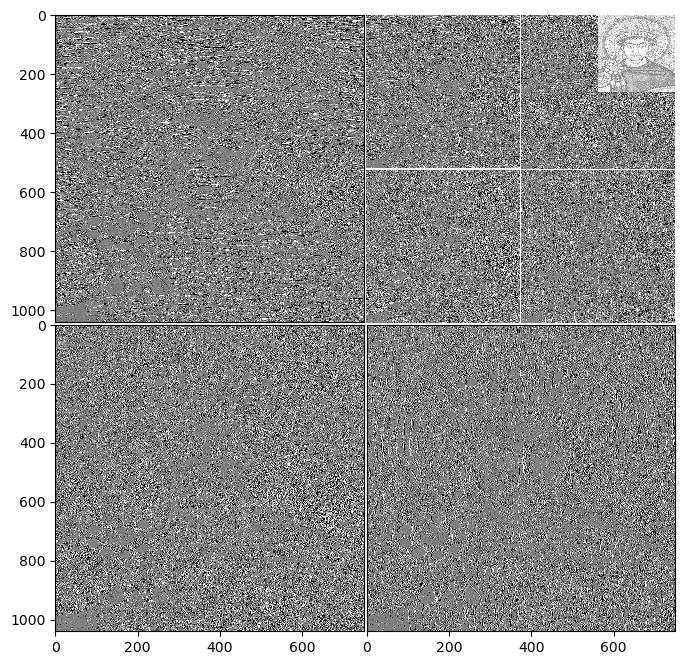

In [27]:
level_rows = int(2**level)
color_map = "turbo" #CMAP
plt.figure(figsize=(level_rows, level_rows))
ax1 = plt.subplot(level_rows,level_rows,level_rows)
ax1.axis('equal')
# plt.imshow(coeffs[0], cmap=color_map)
plt.imshow(coeffs[0], cmap=color_map, 
           vmin=-np.percentile(np.absolute(coeffs[0]),90), 
           vmax=np.percentile(np.absolute(coeffs[0]),90), aspect='auto', interpolation='none')
ax1.axis("off")
for i in range(1,level+1):
    ax1 = plt.subplot(level_rows,level_rows,level_rows-1)
    ax1.axis('equal')
    # plt.imshow(coeffs[i][0], cmap=color_map)
    plt.imshow(coeffs[i][0], cmap=color_map, 
           vmin=-np.percentile(np.absolute(coeffs[i][0]),90), 
           vmax=np.percentile(np.absolute(coeffs[i][0]),90), aspect='auto', interpolation='none')
    if i != level:
        ax1.axis('off')
    else:
        ax1.xaxis.set_visible(False) 
    ax1 = plt.subplot(level_rows,level_rows,2*level_rows-1)
    ax1.axis('equal')
    # plt.imshow(coeffs[i][2], cmap=color_map)
    plt.imshow(coeffs[i][2], cmap=color_map, 
           vmin=-np.percentile(np.absolute(coeffs[i][2]),90), 
           vmax=np.percentile(np.absolute(coeffs[i][2]),90), aspect='auto', interpolation='none')
    if i != level:
        ax1.axis('off')
    ax1 = plt.subplot(level_rows,level_rows,2*level_rows)
    ax1.axis('equal')
    # plt.imshow(coeffs[i][1], cmap=color_map)
    plt.imshow(coeffs[i][1], cmap=color_map, 
           vmin=-np.percentile(np.absolute(coeffs[i][1]),90), 
           vmax=np.percentile(np.absolute(coeffs[i][1]),90), aspect='auto', interpolation='none')
        #    extent=(0,len(pdata[0])/samples_per_sec, start_ch, start_ch + nchannels))
    if i != level:
        ax1.axis('off')
    else:
        ax1.yaxis.set_visible(False) 
    level_rows = int(level_rows/2)
plt.subplots_adjust(wspace=0.01, hspace=0.01)